In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("../clean-data/new-clustering.csv")

In [4]:
df.head()

FIPS Countyname  ST_Name     Black  Med_HH_Inc  ICU_Capacity  State_Test  \
0  1001    Autauga  Alabama  0.219543  116.216163      0.000125           0   
1  1003    Baldwin  Alabama  0.117957  115.402881      0.000193           0   
2  1005    Barbour  Alabama  0.417034   64.360060      0.000173           0   
3  1007       Bibb  Alabama  0.235553   94.075511      0.000000           0   
4  1009     Blount  Alabama  0.016272   97.668988      0.000111           0   

       Hisp  Population_Density  AVG_VENTILATOR_USAGE     Asian   Poverty  \
0  0.032648            0.000022                   2.0  0.011953  0.140249   
1  0.058668            0.000029                   2.0  0.011811  0.135085   
2  0.038303            0.000009                   2.0  0.004194  0.204825   
3  0.027381            0.000009                   1.0  0.001277  0.193937   
4  0.098665            0.000022                   2.0  0.003916  0.172211   

   Deaths  Confirmed   Over_65  Population  
0     103       6702  0.172793     47936.0  
1     300      20588  0.256945    165526.0  
2      55       2244  0.163264     28849.0  
3      58       2560  0.169488     21146.0  
4     134       6472  0.190717     54143.0

In [55]:
to_cluster = df.drop(["FIPS", "Countyname", "ST_Name", "State_Test"], axis = 1)
to_cluster = to_cluster.dropna()

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
mms = MinMaxScaler()
mms.fit(to_cluster)
data_transformed = mms.transform(to_cluster)

In [58]:
ssd = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    ssd.append(km.inertia_)

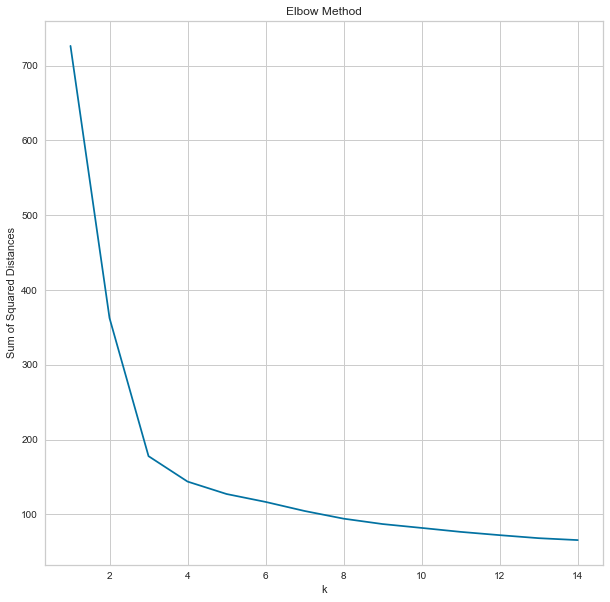

In [59]:
plt.figure(figsize=(10,10))
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method")
plt.show()

In [60]:
kmeans = KMeans(n_clusters = 3)
kmeans = kmeans.fit(data_transformed)

In [61]:
df = df.dropna()
df["KMeans_Cluster"] = kmeans.labels_

In [62]:
df

FIPS  Countyname  ST_Name     Black  Med_HH_Inc  ICU_Capacity  \
0      1001     Autauga  Alabama  0.219543  116.216163      0.000125   
1      1003     Baldwin  Alabama  0.117957  115.402881      0.000193   
2      1005     Barbour  Alabama  0.417034   64.360060      0.000173   
3      1007        Bibb  Alabama  0.235553   94.075511      0.000000   
4      1009      Blount  Alabama  0.016272   97.668988      0.000111   
...     ...         ...      ...       ...         ...           ...   
3136  56037  Sweetwater  Wyoming  0.013145  116.852722      0.000242   
3137  56039       Teton  Wyoming  0.015963  132.208153      0.000331   
3138  56041       Uinta  Wyoming  0.001183   98.991397      0.000154   
3139  56043    Washakie  Wyoming  0.000401   84.557136      0.000401   
3140  56045      Weston  Wyoming  0.002400   89.042764      0.000000   

      State_Test      Hisp  Population_Density  AVG_VENTILATOR_USAGE  \
0              0  0.032648        2.169656e-05                   2.0   
1              0  0.058668        2.868502e-05                   2.0   
2              0  0.038303        8.853070e-06                   2.0   
3              0  0.027381        9.151278e-06                   1.0   
4              0  0.098665        2.204467e-05                   2.0   
...          ...       ...                 ...                   ...   
3136      696725  0.186219        7.619300e-07                   1.0   
3137      696725  0.193217        8.593060e-07                   2.0   
3138      696725  0.096164        2.028246e-06                   1.0   
3139      696725  0.152674        6.682561e-07                   2.0   
3140      696725  0.011399        5.580502e-07                   0.0   

         Asian   Poverty  Deaths  Confirmed   Over_65  Population  \
0     0.011953  0.140249     103       6702  0.172793     47936.0   
1     0.011811  0.135085     300      20588  0.256945    165526.0   
2     0.004194  0.204825      55       2244  0.163264     28849.0   
3     0.001277  0.193937      58       2560  0.169488     21146.0   
4     0.003916  0.172211     134       6472  0.190717     54143.0   
...        ...       ...     ...        ...       ...         ...   
3136  0.008674  0.093015      37       4079  0.133933     37123.0   
3137  0.016074  0.077110       9       3653  0.180513     18104.0   
3138  0.001646  0.087370      12       2140  0.137046     19446.0   
3139  0.000000  0.112968      26        893  0.226337      7480.0   
3140  0.008100  0.103795       5        639  0.205490      6667.0   

      KMeans_Cluster  Hierarchical_cluster  
0                  1                     1  
1                  1                     1  
2                  2                     2  
3                  2                     2  
4                  1                     1  
...              ...                   ...  
3136               1                     1  
3137               1                     1  
3138               1                     1  
3139               1                     1  
3140               1                     1  

[2361 rows x 18 columns]

In [63]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(to_cluster)

X_reduced = pca.transform(to_cluster)

In [64]:
X_reduceddf = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
X_reduceddf["cluster"] = kmeans.labels_
X_reduceddf.head()

PC1          PC2  cluster
0 -35566.076739  1783.941038        1
1  82837.798560   897.918789        1
2 -55060.044868  -259.018354        2
3 -62663.497123  1015.174075        2
4 -29436.139855   782.227342        1

In [65]:
centres_reduced = pca.transform(kmeans.cluster_centers_)

In [66]:
import plotly.express as px
components = X_reduced
fig = px.scatter(components, x=0, y=1, color=X_reduceddf["cluster"])
fig.show()

ValueError: 'c' argument has 2361 elements, which is inconsistent with 'x' and 'y' with size 13.

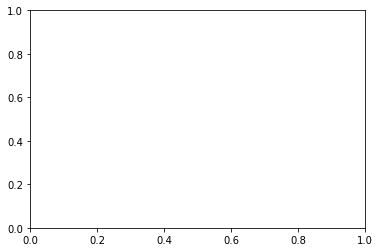

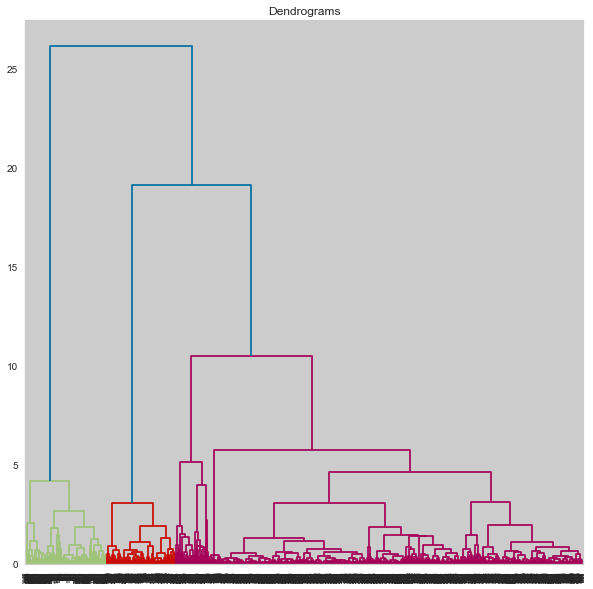

In [90]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,10))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_transformed, method='ward'))

In [68]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_transformed)

array([0, 0, 2, ..., 0, 0, 0])

In [69]:
df["Hierarchical_cluster"] = cluster.labels_

In [70]:
df

FIPS  Countyname  ST_Name     Black  Med_HH_Inc  ICU_Capacity  \
0      1001     Autauga  Alabama  0.219543  116.216163      0.000125   
1      1003     Baldwin  Alabama  0.117957  115.402881      0.000193   
2      1005     Barbour  Alabama  0.417034   64.360060      0.000173   
3      1007        Bibb  Alabama  0.235553   94.075511      0.000000   
4      1009      Blount  Alabama  0.016272   97.668988      0.000111   
...     ...         ...      ...       ...         ...           ...   
3136  56037  Sweetwater  Wyoming  0.013145  116.852722      0.000242   
3137  56039       Teton  Wyoming  0.015963  132.208153      0.000331   
3138  56041       Uinta  Wyoming  0.001183   98.991397      0.000154   
3139  56043    Washakie  Wyoming  0.000401   84.557136      0.000401   
3140  56045      Weston  Wyoming  0.002400   89.042764      0.000000   

      State_Test      Hisp  Population_Density  AVG_VENTILATOR_USAGE  \
0              0  0.032648        2.169656e-05                   2.0   
1              0  0.058668        2.868502e-05                   2.0   
2              0  0.038303        8.853070e-06                   2.0   
3              0  0.027381        9.151278e-06                   1.0   
4              0  0.098665        2.204467e-05                   2.0   
...          ...       ...                 ...                   ...   
3136      696725  0.186219        7.619300e-07                   1.0   
3137      696725  0.193217        8.593060e-07                   2.0   
3138      696725  0.096164        2.028246e-06                   1.0   
3139      696725  0.152674        6.682561e-07                   2.0   
3140      696725  0.011399        5.580502e-07                   0.0   

         Asian   Poverty  Deaths  Confirmed   Over_65  Population  \
0     0.011953  0.140249     103       6702  0.172793     47936.0   
1     0.011811  0.135085     300      20588  0.256945    165526.0   
2     0.004194  0.204825      55       2244  0.163264     28849.0   
3     0.001277  0.193937      58       2560  0.169488     21146.0   
4     0.003916  0.172211     134       6472  0.190717     54143.0   
...        ...       ...     ...        ...       ...         ...   
3136  0.008674  0.093015      37       4079  0.133933     37123.0   
3137  0.016074  0.077110       9       3653  0.180513     18104.0   
3138  0.001646  0.087370      12       2140  0.137046     19446.0   
3139  0.000000  0.112968      26        893  0.226337      7480.0   
3140  0.008100  0.103795       5        639  0.205490      6667.0   

      KMeans_Cluster  Hierarchical_cluster  
0                  1                     0  
1                  1                     0  
2                  2                     2  
3                  2                     2  
4                  1                     0  
...              ...                   ...  
3136               1                     0  
3137               1                     0  
3138               1                     0  
3139               1                     0  
3140               1                     0  

[2361 rows x 18 columns]

In [71]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [72]:
!pip install yellowbrick

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=3))

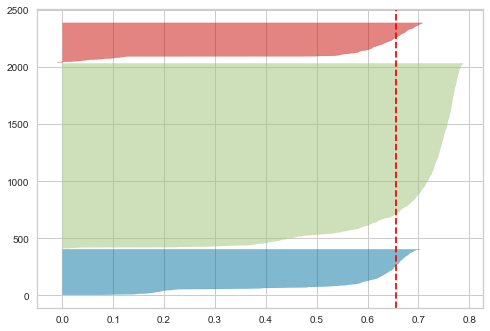

In [73]:
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(data_transformed)

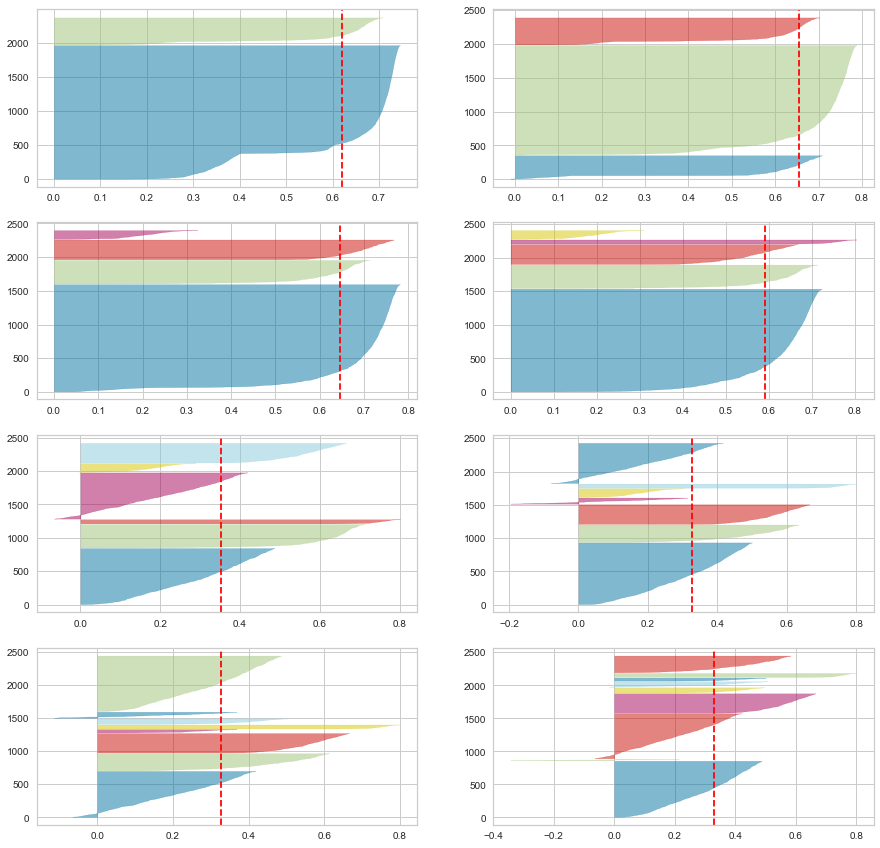

In [74]:
fig, ax = plt.subplots(4, 2, figsize=(15, 15))
for i in [2, 3, 4, 5, 6, 7, 8, 9]:
    km = KMeans(n_clusters=i)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_transformed)

In [76]:
X_reduceddf["clusterH"] = cluster.labels_
components = X_reduced
fig = px.scatter(components, x=0, y=1, color=X_reduceddf["clusterH"])
fig.show()

In [84]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN().fit(data_transformed)
df["DBSCAN_cluster"] = dbscan.labels_

In [85]:
df

FIPS  Countyname  ST_Name     Black  Med_HH_Inc  ICU_Capacity  \
0      1001     Autauga  Alabama  0.219543  116.216163      0.000125   
1      1003     Baldwin  Alabama  0.117957  115.402881      0.000193   
2      1005     Barbour  Alabama  0.417034   64.360060      0.000173   
3      1007        Bibb  Alabama  0.235553   94.075511      0.000000   
4      1009      Blount  Alabama  0.016272   97.668988      0.000111   
...     ...         ...      ...       ...         ...           ...   
3136  56037  Sweetwater  Wyoming  0.013145  116.852722      0.000242   
3137  56039       Teton  Wyoming  0.015963  132.208153      0.000331   
3138  56041       Uinta  Wyoming  0.001183   98.991397      0.000154   
3139  56043    Washakie  Wyoming  0.000401   84.557136      0.000401   
3140  56045      Weston  Wyoming  0.002400   89.042764      0.000000   

      State_Test      Hisp  Population_Density  AVG_VENTILATOR_USAGE  \
0              0  0.032648        2.169656e-05                   2.0   
1              0  0.058668        2.868502e-05                   2.0   
2              0  0.038303        8.853070e-06                   2.0   
3              0  0.027381        9.151278e-06                   1.0   
4              0  0.098665        2.204467e-05                   2.0   
...          ...       ...                 ...                   ...   
3136      696725  0.186219        7.619300e-07                   1.0   
3137      696725  0.193217        8.593060e-07                   2.0   
3138      696725  0.096164        2.028246e-06                   1.0   
3139      696725  0.152674        6.682561e-07                   2.0   
3140      696725  0.011399        5.580502e-07                   0.0   

         Asian   Poverty  Deaths  Confirmed   Over_65  Population  \
0     0.011953  0.140249     103       6702  0.172793     47936.0   
1     0.011811  0.135085     300      20588  0.256945    165526.0   
2     0.004194  0.204825      55       2244  0.163264     28849.0   
3     0.001277  0.193937      58       2560  0.169488     21146.0   
4     0.003916  0.172211     134       6472  0.190717     54143.0   
...        ...       ...     ...        ...       ...         ...   
3136  0.008674  0.093015      37       4079  0.133933     37123.0   
3137  0.016074  0.077110       9       3653  0.180513     18104.0   
3138  0.001646  0.087370      12       2140  0.137046     19446.0   
3139  0.000000  0.112968      26        893  0.226337      7480.0   
3140  0.008100  0.103795       5        639  0.205490      6667.0   

      KMeans_Cluster  Hierarchical_cluster  DBSCAN_cluster  
0                  1                     0               0  
1                  1                     0               0  
2                  2                     2               1  
3                  2                     2               1  
4                  1                     0               0  
...              ...                   ...             ...  
3136               1                     0               0  
3137               1                     0               0  
3138               1                     0               0  
3139               1                     0               0  
3140               1                     0               0  

[2361 rows x 19 columns]

In [86]:
X_reduceddf["clusterDBSCAN"] = dbscan.labels_
components = X_reduced
fig = px.scatter(components, x=0, y=1, color=X_reduceddf["clusterDBSCAN"])
fig.show()

In [87]:
df

FIPS  Countyname  ST_Name     Black  Med_HH_Inc  ICU_Capacity  \
0      1001     Autauga  Alabama  0.219543  116.216163      0.000125   
1      1003     Baldwin  Alabama  0.117957  115.402881      0.000193   
2      1005     Barbour  Alabama  0.417034   64.360060      0.000173   
3      1007        Bibb  Alabama  0.235553   94.075511      0.000000   
4      1009      Blount  Alabama  0.016272   97.668988      0.000111   
...     ...         ...      ...       ...         ...           ...   
3136  56037  Sweetwater  Wyoming  0.013145  116.852722      0.000242   
3137  56039       Teton  Wyoming  0.015963  132.208153      0.000331   
3138  56041       Uinta  Wyoming  0.001183   98.991397      0.000154   
3139  56043    Washakie  Wyoming  0.000401   84.557136      0.000401   
3140  56045      Weston  Wyoming  0.002400   89.042764      0.000000   

      State_Test      Hisp  Population_Density  AVG_VENTILATOR_USAGE  \
0              0  0.032648        2.169656e-05                   2.0   
1              0  0.058668        2.868502e-05                   2.0   
2              0  0.038303        8.853070e-06                   2.0   
3              0  0.027381        9.151278e-06                   1.0   
4              0  0.098665        2.204467e-05                   2.0   
...          ...       ...                 ...                   ...   
3136      696725  0.186219        7.619300e-07                   1.0   
3137      696725  0.193217        8.593060e-07                   2.0   
3138      696725  0.096164        2.028246e-06                   1.0   
3139      696725  0.152674        6.682561e-07                   2.0   
3140      696725  0.011399        5.580502e-07                   0.0   

         Asian   Poverty  Deaths  Confirmed   Over_65  Population  \
0     0.011953  0.140249     103       6702  0.172793     47936.0   
1     0.011811  0.135085     300      20588  0.256945    165526.0   
2     0.004194  0.204825      55       2244  0.163264     28849.0   
3     0.001277  0.193937      58       2560  0.169488     21146.0   
4     0.003916  0.172211     134       6472  0.190717     54143.0   
...        ...       ...     ...        ...       ...         ...   
3136  0.008674  0.093015      37       4079  0.133933     37123.0   
3137  0.016074  0.077110       9       3653  0.180513     18104.0   
3138  0.001646  0.087370      12       2140  0.137046     19446.0   
3139  0.000000  0.112968      26        893  0.226337      7480.0   
3140  0.008100  0.103795       5        639  0.205490      6667.0   

      KMeans_Cluster  Hierarchical_cluster  DBSCAN_cluster  
0                  1                     0               0  
1                  1                     0               0  
2                  2                     2               1  
3                  2                     2               1  
4                  1                     0               0  
...              ...                   ...             ...  
3136               1                     0               0  
3137               1                     0               0  
3138               1                     0               0  
3139               1                     0               0  
3140               1                     0               0  

[2361 rows x 19 columns]

In [88]:
from sklearn.cluster import MeanShift
ms = MeanShift().fit(data_transformed)
df["MeanShift_cluster"] = ms.labels_

In [89]:
X_reduceddf["clusterMS"] = ms.labels_
components = X_reduced
fig = px.scatter(components, x=0, y=1, color=X_reduceddf["clusterMS"])
fig.show()

In [91]:
import seaborn as sns

/Users/dallas/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/Users/dallas/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.



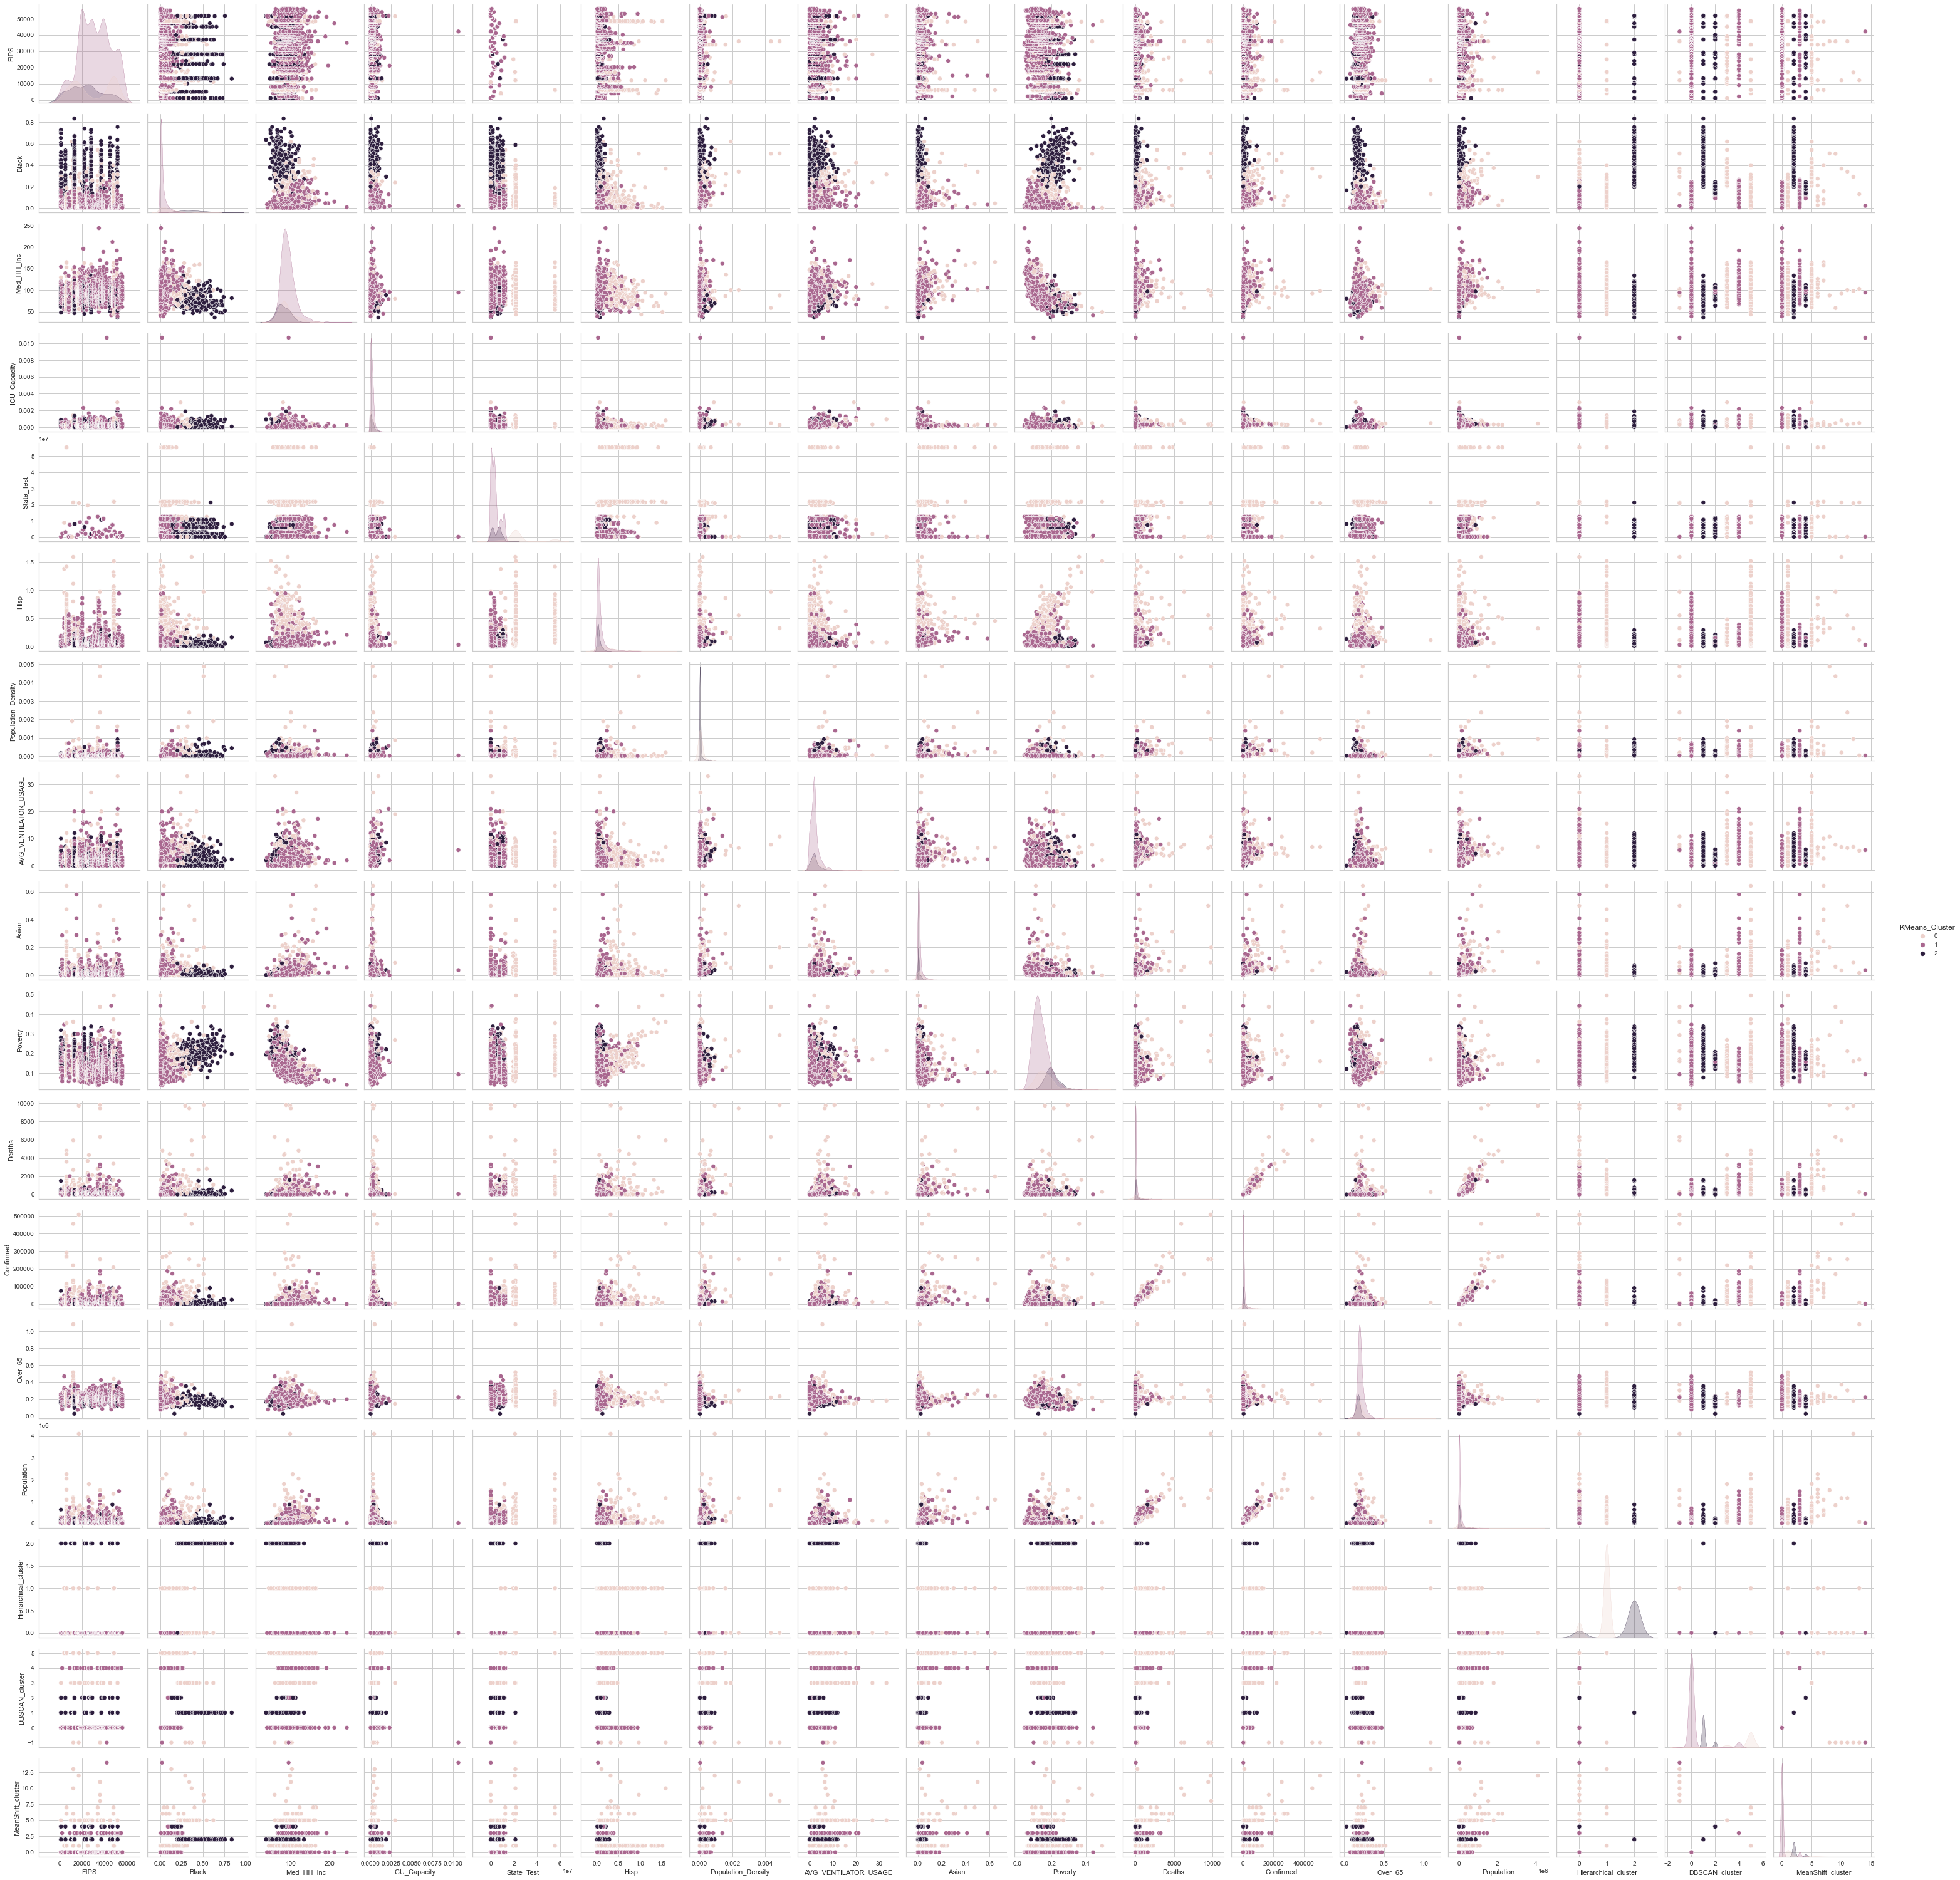

In [94]:
sns.pairplot(df, hue="KMeans_Cluster")

/Users/dallas/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.



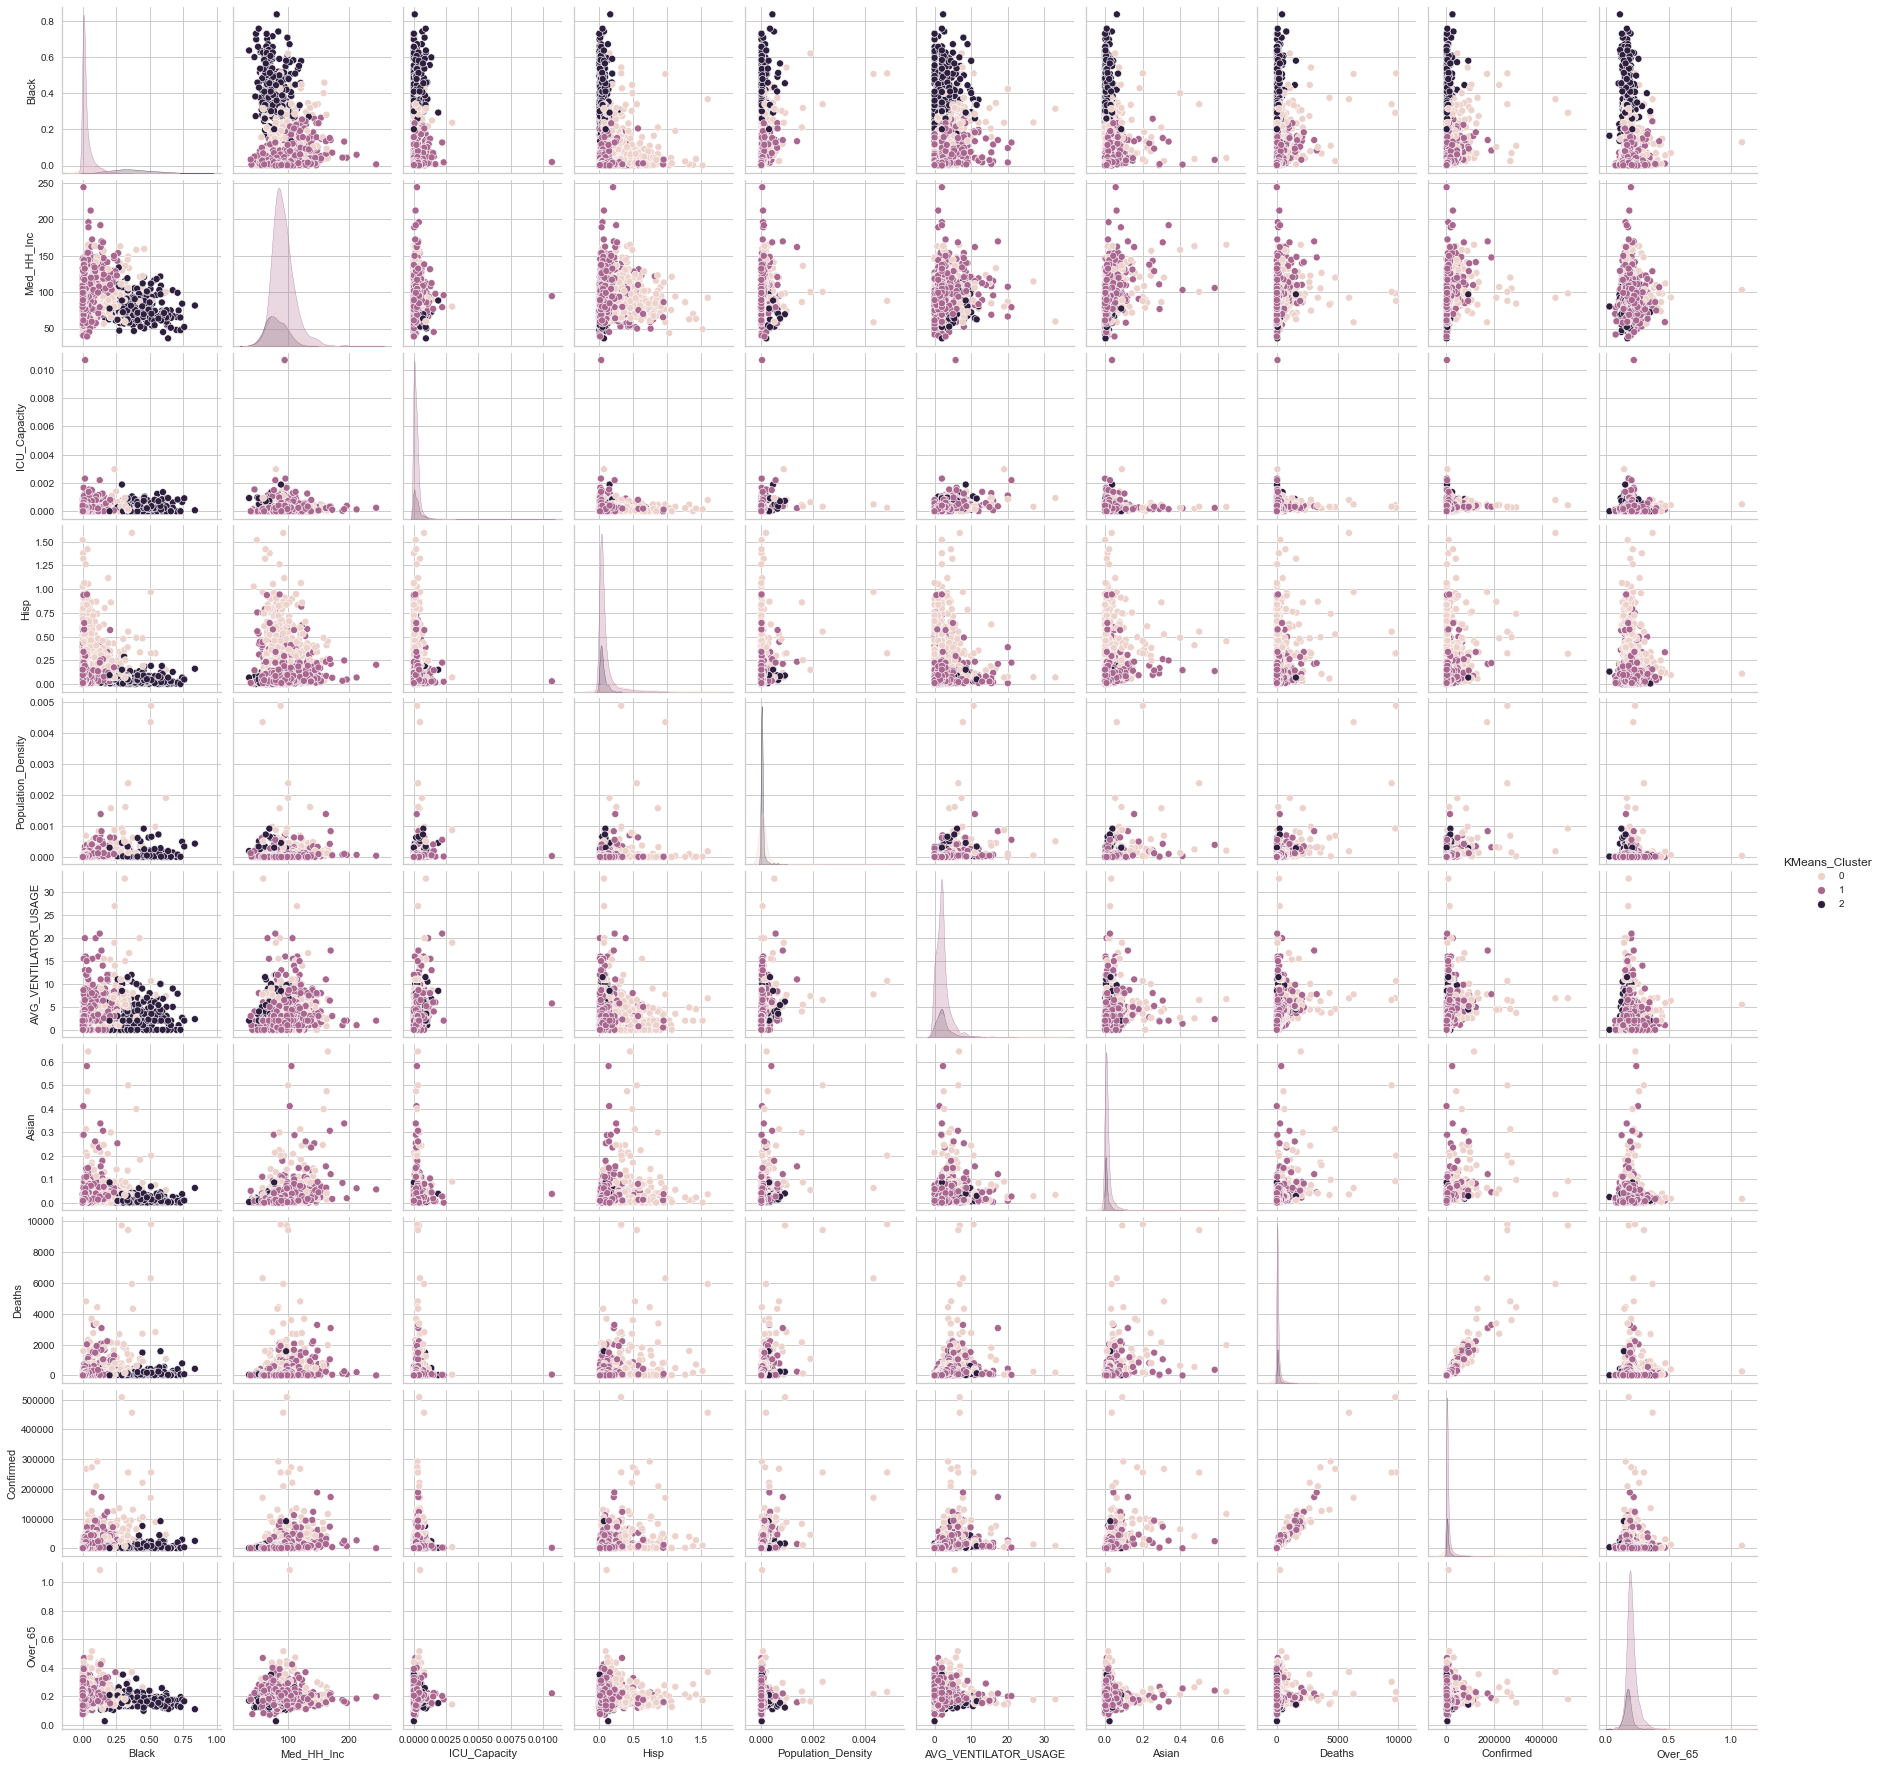

In [97]:
kmeans_sns = sns.pairplot(df[["Black", "Med_HH_Inc", "ICU_Capacity", "Hisp", "Population_Density", "AVG_VENTILATOR_USAGE",
                "Asian", "Deaths", "Confirmed", "Over_65", "KMeans_Cluster"]], hue="KMeans_Cluster")
kmeans_sns.savefig("../visualizations/kmeans-pairplot.png")

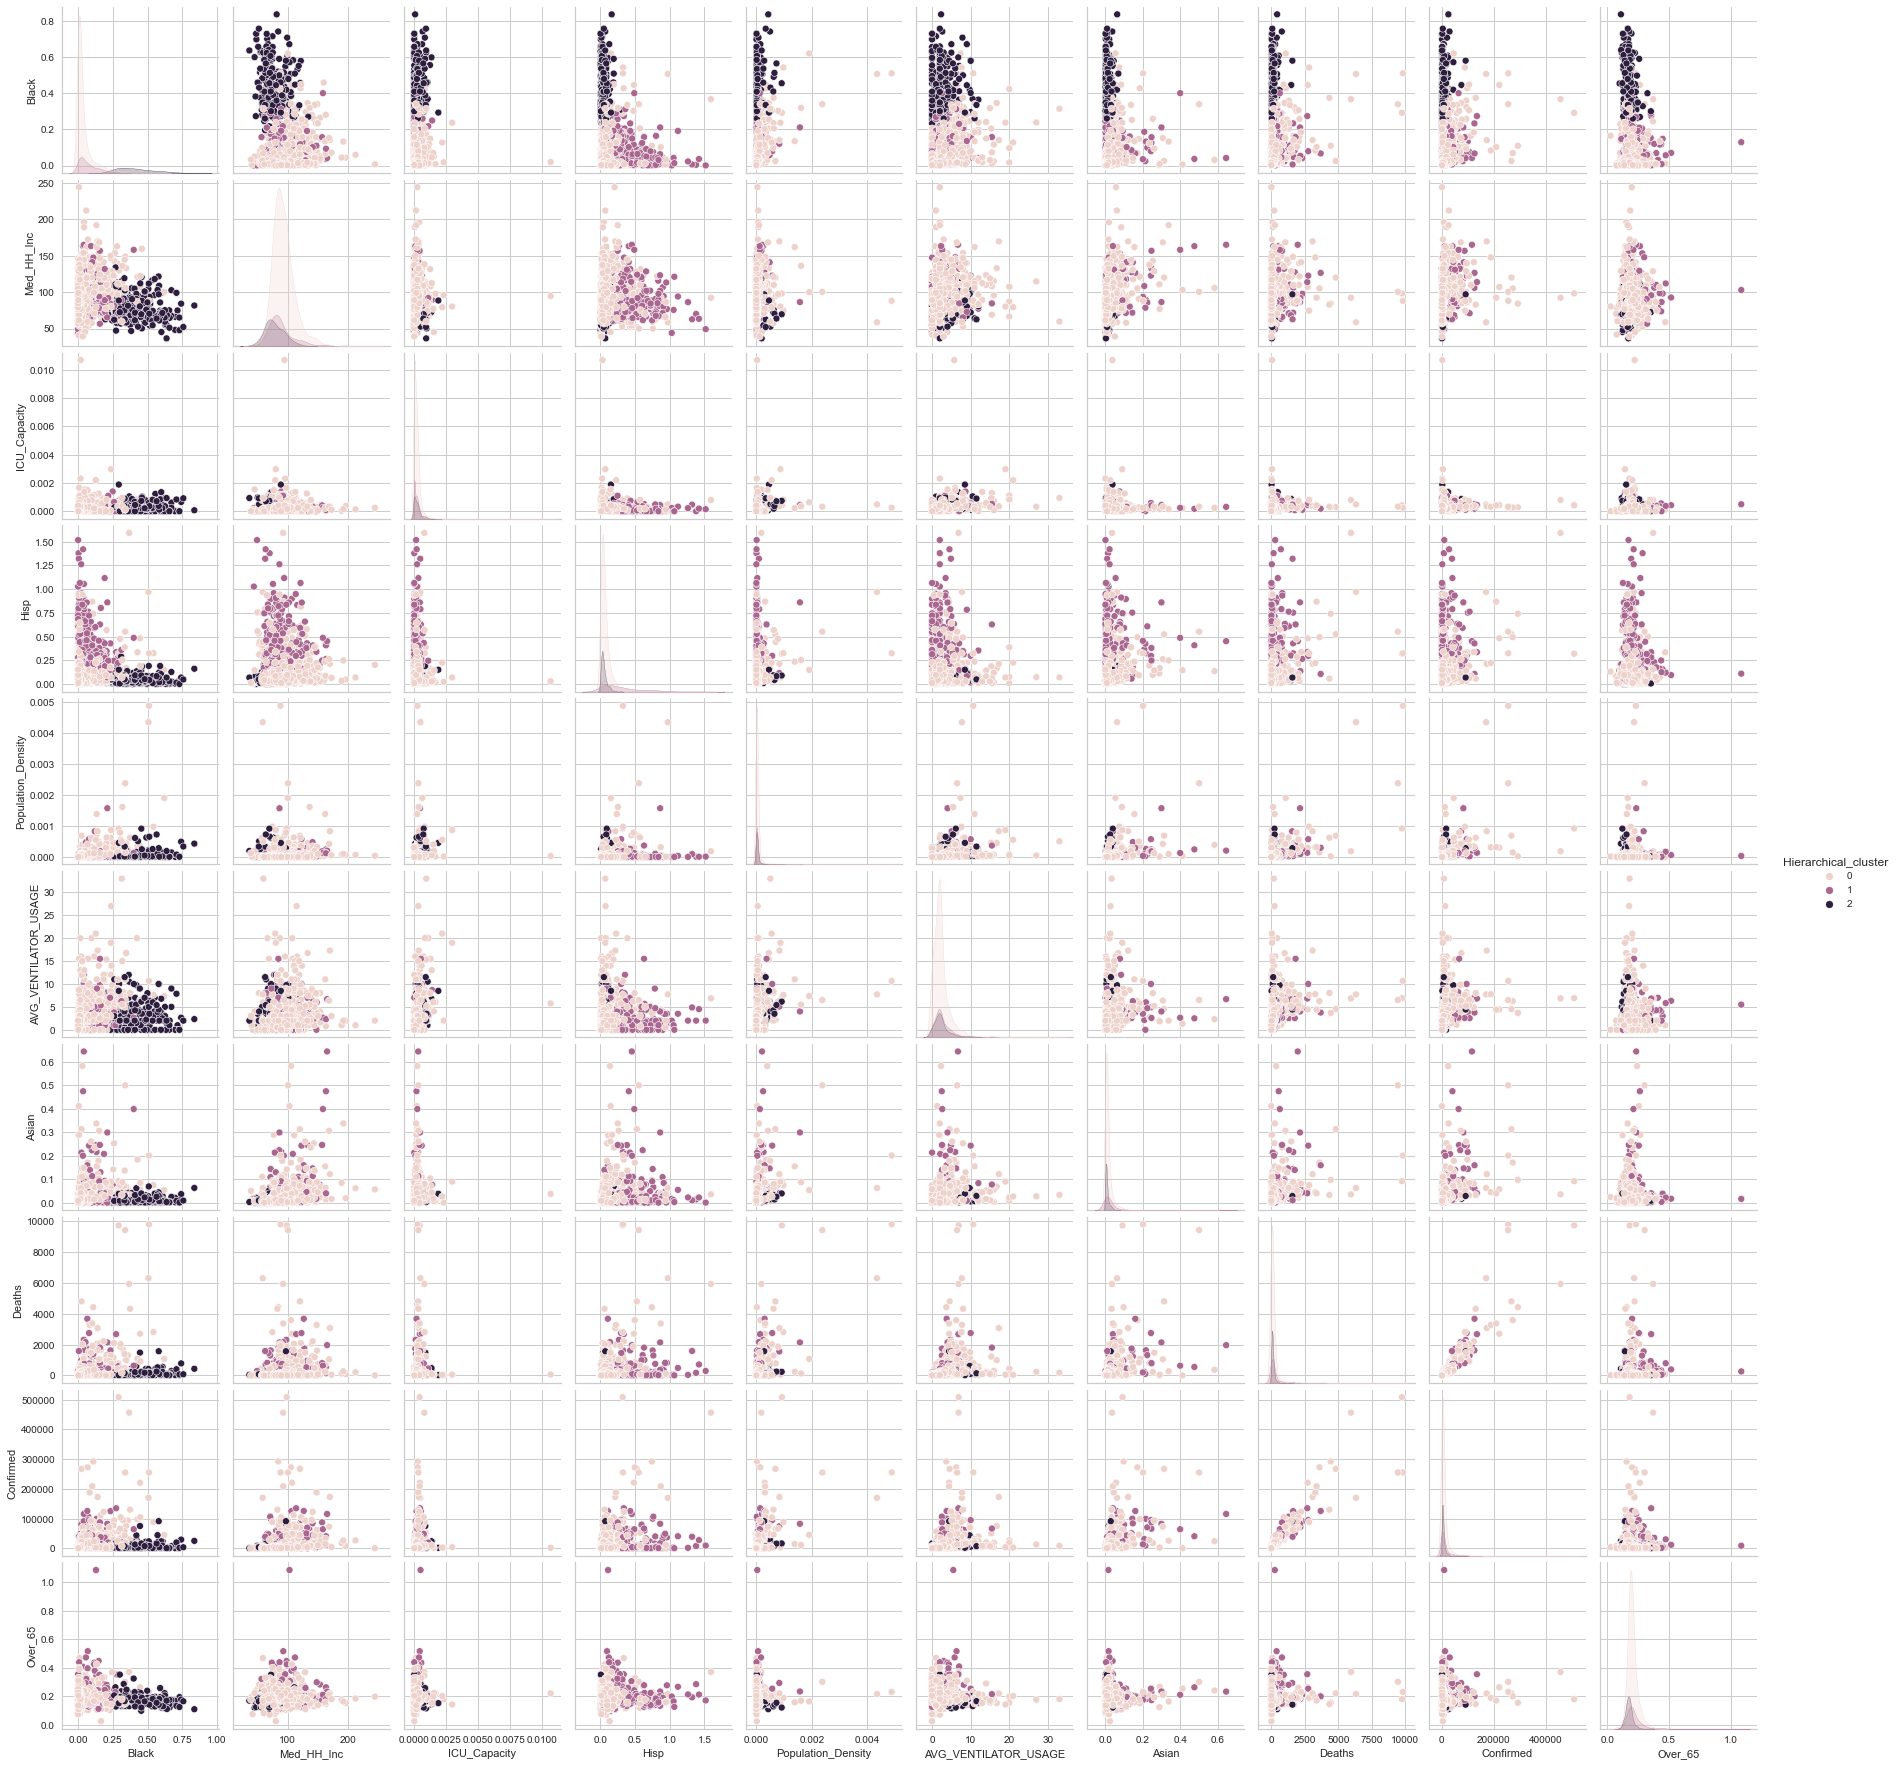

In [101]:
ha_sns = sns.pairplot(df[["Black", "Med_HH_Inc", "ICU_Capacity", "Hisp", "Population_Density", "AVG_VENTILATOR_USAGE",
                "Asian", "Deaths", "Confirmed", "Over_65", "Hierarchical_cluster"]], hue="Hierarchical_cluster")
ha_sns.savefig("../visualizations/ha-pairplot.png")

/Users/dallas/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/Users/dallas/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.



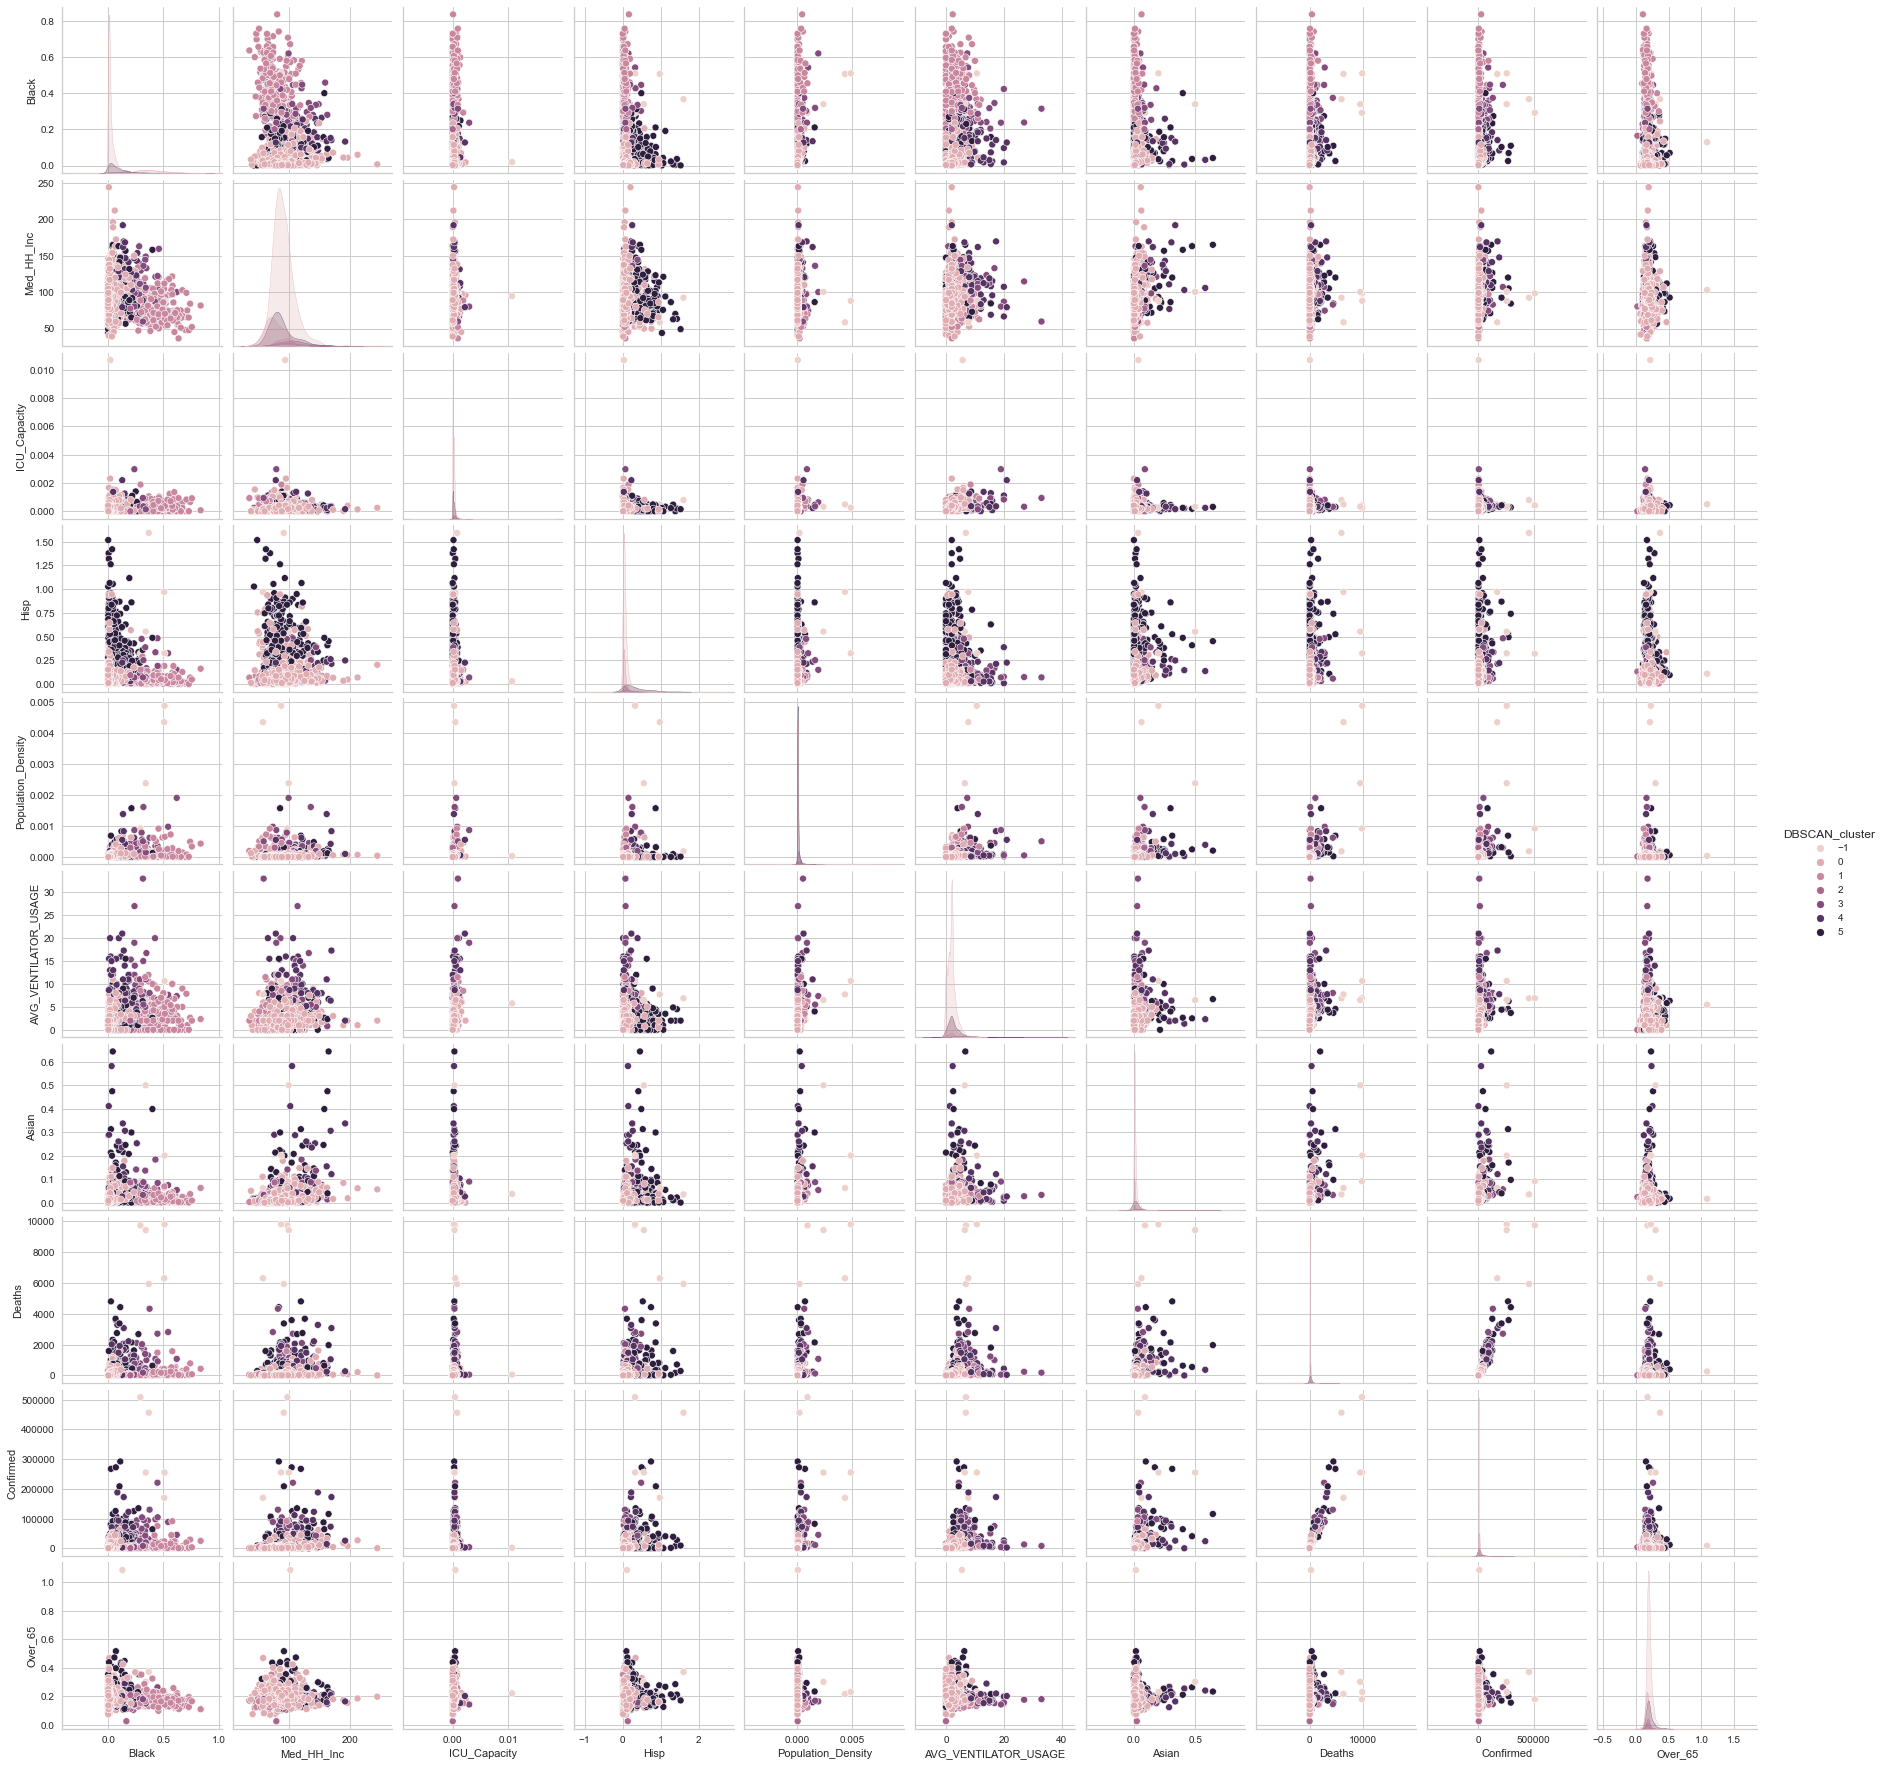

In [102]:
dbscan_sns = sns.pairplot(df[["Black", "Med_HH_Inc", "ICU_Capacity", "Hisp", "Population_Density", "AVG_VENTILATOR_USAGE",
                "Asian", "Deaths", "Confirmed", "Over_65", "DBSCAN_cluster"]], hue="DBSCAN_cluster")
dbscan_sns.savefig("../visualizations/dbscan-pairplot.png")

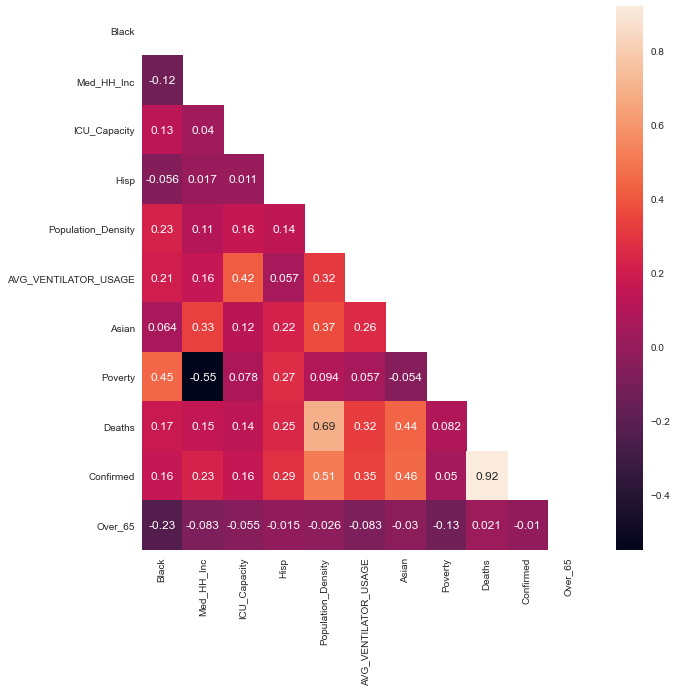

In [115]:
to_cluster.drop(["Population"], inplace=True, axis=1)
mask = np.zeros_like(to_cluster.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10,10))
    ax = sns.heatmap(to_cluster.corr(), annot=True, mask=mask)
    f.savefig("../visualizations/heatmap.png")

In [109]:
df.to_csv("../clean-data/new-clusters.csv")

AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'

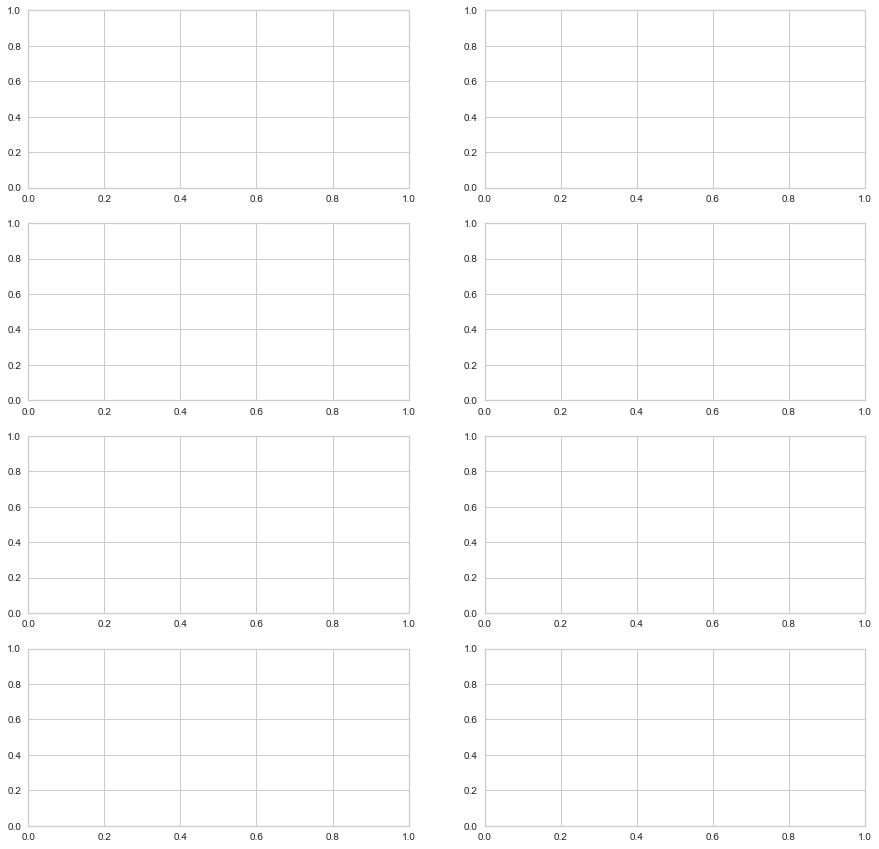

In [110]:
fig, ax = plt.subplots(4, 2, figsize=(15, 15))
for i in [2, 3, 4, 5]:
    ha = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(ha, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_transformed)